In [1]:
# 🧠 Task 3: CNN for Image Classification on MNIST Dataset

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
# Reshape to fit CNN input (batch, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [5]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0–9
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 70s 40ms/step - accuracy: 0.8884 - loss: 0.3597 - val_accuracy: 0.9867 - val_loss: 0.0483
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 39ms/step - accuracy: 0.9827 - loss: 0.0555 - val_accuracy: 0.9885 - val_loss: 0.0399
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 60s 35ms/step - accuracy: 0.9876 - loss: 0.0363 - val_accuracy: 0.9860 - val_loss: 0.0440
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.9909 - loss: 0.0279 - val_accuracy: 0.9900 - val_loss: 0.0341
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 37ms/step - accuracy: 0.9939 - loss: 0.0189 - val_accuracy: 0.9885 - val_loss: 0.0431


In [8]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9850 - loss: 0.0461

Test Accuracy: 98.75%


In [10]:
  # Classification report and confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [11]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



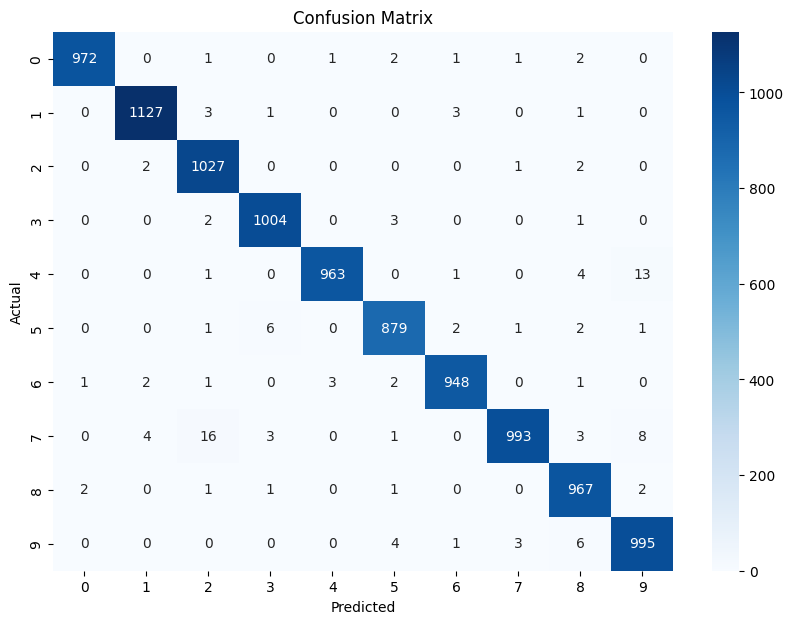

In [12]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()